Datasets Import

In [1]:
import pandas as pd
import numpy as np
from arch import arch_model

stock_data={
    'Asian_Paints':pd.read_csv('./Datasets/Asian_Paints.csv',index_col=0),
    'Adani_Enterprises':pd.read_csv('./Datasets/Adani_Enterprises.csv',index_col=0),
    'Adani_Ports':pd.read_csv('./Datasets/Adani_Ports.csv',index_col=0),
    'Apollo_Hospital':pd.read_csv('./Datasets/ApolloHospital.csv',index_col=0),
    'Axis_Bank':pd.read_csv('./Datasets/Axis_Bank.csv',index_col=0),
    'Bajaj_Auto':pd.read_csv('./Datasets/Bajaj_Auto.csv',index_col=0),
    'Bajaj_Finance':pd.read_csv('./Datasets/Bajaj_Finance.csv',index_col=0),
    'Bajaj_Finserv':pd.read_csv('./Datasets/Bajaj_Finserv.csv',index_col=0),
    'Bharat_Petroleum':pd.read_csv('./Datasets/Bharat_Petroleum.csv',index_col=0),
    'Bharti_Airtel':pd.read_csv('./Datasets/Bharti_Airtel.csv',index_col=0),
    'Britannia_Industries':pd.read_csv('./Datasets/Britannia_Industries.csv',index_col=0),
    'Cipla':pd.read_csv('./Datasets/Cipla.csv',index_col=0),
    'Coal_India':pd.read_csv('./Datasets/Coal_India.csv',index_col=0),
    'Divi_Labs':pd.read_csv('./Datasets/Divi_Labs.csv',index_col=0),
    'Dr_Reddy':pd.read_csv('./Datasets/Dr_Reddy.csv',index_col=0),
    'Eicher_Motors':pd.read_csv('./Datasets/Eicher_Motors.csv',index_col=0),
    'Grasim_Industries':pd.read_csv('./Datasets/Grasim_Industries.csv',index_col=0),
    'HCL_Tech':pd.read_csv('./Datasets/HCL_Tech.csv',index_col=0),
    'HDFC_Bank':pd.read_csv('./Datasets/HDFC_Bank.csv',index_col=0),
    'HDFC_Life':pd.read_csv('./Datasets/HDFC_Life.csv',index_col=0),
    'Hero_Motocorp':pd.read_csv('./Datasets/Hero_Motocorp.csv',index_col=0),
    'Hindalco':pd.read_csv('./Datasets/Hindalco.csv',index_col=0),
    'Hinudstan_Unilever':pd.read_csv('./Datasets/Hindustan_Unilever.csv',index_col=0),
    'ICICI_Bank':pd.read_csv('./Datasets/ICICI_Bank.csv',index_col=0),
    'IndusInd_Bank':pd.read_csv('./Datasets/IndusInd_Bank.csv',index_col=0),
    'Infosys':pd.read_csv('./Datasets/Infosys.csv',index_col=0),
    'ITC':pd.read_csv('./Datasets/ITC.csv',index_col=0),
    'JSW_Steel':pd.read_csv('./Datasets/Jsw_steel.csv',index_col=0),
    'Kotak_Mahindra':pd.read_csv('./Datasets/Kotak_Mahindra.csv',index_col=0),
    'L&T':pd.read_csv('./Datasets/L&T.csv',index_col=0),
    'LTIMindTree':pd.read_csv('./Datasets/LTIMindTree.csv',index_col=0),
    'Mahindra&Mahindra':pd.read_csv('./Datasets/Mahindra&Mahindra.csv',index_col=0),
    'Maruti_Suzuki':pd.read_csv('./Datasets/Maruti_Suzuki.csv',index_col=0),
    'Nestle_India':pd.read_csv('./Datasets/Nestle_India.csv',index_col=0),
    'NTPC':pd.read_csv('./Datasets/NTPC.csv',index_col=0),
    'ONGC':pd.read_csv('./Datasets/ONGC.csv',index_col=0),
    'PowerGrid':pd.read_csv('./Datasets/PowerGrid_Corp.csv',index_col=0),
    'Reliance_Industries':pd.read_csv('./Datasets/Reliance_Industries.csv',index_col=0),
    'SBI':pd.read_csv('./Datasets/SBI.csv',index_col=0),
    'SBI_Life_Insurance':pd.read_csv('./Datasets/SBI_Life_Insurance.csv',index_col=0),
    'Shriram_finance':pd.read_csv('./Datasets/Shriram_finance.csv',index_col=0),
    'Sun_Pharma':pd.read_csv('./Datasets/SunPharma.csv',index_col=0),
    'Tata_consumer':pd.read_csv('./Datasets/Tata_Consumer_Services.csv',index_col=0),
    'Tata_Motors':pd.read_csv('./Datasets/Tata_Motors.csv',index_col=0),
    'Tata_Steel':pd.read_csv('./Datasets/Tata_Steel.csv',index_col=0),
    'TCS':pd.read_csv('./Datasets/TCS.csv',index_col=0),
    'Tech_Mahindra':pd.read_csv('./Datasets/Tech_Mahindra.csv',index_col=0),
    'Titan':pd.read_csv('./Datasets/Titan.csv',index_col=0),
    'UltraTech':pd.read_csv('./Datasets/UltraTech.csv',index_col=0),
    'Wipro':pd.read_csv('./Datasets/Wipro.csv',index_col=0)

}



In [2]:
print(len(stock_data))

50


Best AIC Function

In [3]:
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q,rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

GARCH Model Function

In [4]:
def fit_garch_model_and_forecast_volatility(rescaled_returns, p_value, q_value):
    # Fit GARCH model
    model = arch_model(rescaled_returns, vol='Garch', p=p_value, q=q_value, rescale=False)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity

    # Forecast volatility for the next 1 day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    return forecast_volatility

AIC Results

In [5]:
volatility_results = {}

# Loop over each company's stock price data
actual_volatilities={}
thresholded_stocks = []
threshold = 0.05  # Define threshold for volatility

for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  
    rescaled_returns=returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order,p_value,q_value = select_best_order(rescaled_returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)

    volatility_results[company] = fit_garch_model_and_forecast_volatility(rescaled_returns, p_value, q_value)
    forecasted_volatilities = np.array(list(volatility_results.values())).reshape(-1, 1)

    # Store the result in the dictionary

Best AIC for: Asian_Paints -4511.020024776775
Best Order (p, q): (1, 4)
Best AIC for: Adani_Enterprises -3400.6868637405582
Best Order (p, q): (2, 2)
Best AIC for: Adani_Ports -3751.8741736825905
Best Order (p, q): (1, 2)
Best AIC for: Apollo_Hospital -4076.820521567911
Best Order (p, q): (1, 5)
Best AIC for: Axis_Bank -4362.335567783504
Best Order (p, q): (1, 1)
Best AIC for: Bajaj_Auto -4454.142654195566
Best Order (p, q): (1, 1)
Best AIC for: Bajaj_Finance -4106.517751199837
Best Order (p, q): (4, 3)
Best AIC for: Bajaj_Finserv -4115.224543407769
Best Order (p, q): (2, 4)
Best AIC for: Bharat_Petroleum -4226.891731543361
Best Order (p, q): (3, 2)
Best AIC for: Bharti_Airtel -4535.257731590818
Best Order (p, q): (1, 2)
Best AIC for: Britannia_Industries -4760.64015790204
Best Order (p, q): (3, 1)
Best AIC for: Cipla -4464.443816978358
Best Order (p, q): (1, 1)
Best AIC for: Coal_India -4035.323304527393
Best Order (p, q): (1, 2)
Best AIC for: Divi_Labs -4261.707596453489
Best Order (

Forecasted Volatilities V/S Actual

In [6]:
print(volatility_results)
print(actual_volatilities)

{'Asian_Paints': 0.011858384684897269, 'Adani_Enterprises': 0.02554165552581471, 'Adani_Ports': 0.01971918673982236, 'Apollo_Hospital': 0.01457398127387461, 'Axis_Bank': 0.01371214230055575, 'Bajaj_Auto': 0.015871910179976342, 'Bajaj_Finance': 0.01600356701080269, 'Bajaj_Finserv': 0.015593130979349635, 'Bharat_Petroleum': 0.018464961309278778, 'Bharti_Airtel': 0.01378941359273387, 'Britannia_Industries': 0.013461155111540918, 'Cipla': 0.014945984682567278, 'Coal_India': 0.022082548486808542, 'Divi_Labs': 0.01743158170644077, 'Dr_Reddy': 0.01360797346433005, 'Eicher_Motors': 0.017103237060592143, 'Grasim_Industries': 0.016137245238357363, 'HCL_Tech': 0.014763698650303289, 'HDFC_Bank': 0.01142352538159613, 'HDFC_Life': 0.014350290279364474, 'Hero_Motocorp': 0.020962804718583607, 'Hindalco': 0.02292953047044104, 'Hinudstan_Unilever': 0.012044774412859791, 'ICICI_Bank': 0.012113151805205986, 'IndusInd_Bank': 0.01720939758845729, 'Infosys': 0.01409163508817392, 'ITC': 0.014652394104110077, 

In [7]:
volatilities={}
for company, volatility in volatility_results.items():
        if volatility <= threshold:
            thresholded_stocks.append(company)
print("Forecasted Volatility Results:")
for company, volatility in volatility_results.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")
print('\n')
print("Actual Volatility Results:")
for company, volatility in actual_volatilities.items():
    actual_volatilities[company]=volatility
    print(f"{company}: {volatility}")

Forecasted Volatility Results:
Asian_Paints: 0.011858384684897269
Adani_Enterprises: 0.02554165552581471
Adani_Ports: 0.01971918673982236
Apollo_Hospital: 0.01457398127387461
Axis_Bank: 0.01371214230055575
Bajaj_Auto: 0.015871910179976342
Bajaj_Finance: 0.01600356701080269
Bajaj_Finserv: 0.015593130979349635
Bharat_Petroleum: 0.018464961309278778
Bharti_Airtel: 0.01378941359273387
Britannia_Industries: 0.013461155111540918
Cipla: 0.014945984682567278
Coal_India: 0.022082548486808542
Divi_Labs: 0.01743158170644077
Dr_Reddy: 0.01360797346433005
Eicher_Motors: 0.017103237060592143
Grasim_Industries: 0.016137245238357363
HCL_Tech: 0.014763698650303289
HDFC_Bank: 0.01142352538159613
HDFC_Life: 0.014350290279364474
Hero_Motocorp: 0.020962804718583607
Hindalco: 0.02292953047044104
Hinudstan_Unilever: 0.012044774412859791
ICICI_Bank: 0.012113151805205986
IndusInd_Bank: 0.01720939758845729
Infosys: 0.01409163508817392
ITC: 0.014652394104110077
JSW_Steel: 0.015857048843606326
Kotak_Mahindra: 0.0

In [8]:
from importnb import Notebook
with Notebook():
    from Models.kmeans import find_optimal_k_and_cluster


Optimak k & silhouette score calculation

In [9]:
optimal_k, silhouette_scores = find_optimal_k_and_cluster(forecasted_volatilities)

print("Optimal number of clusters (k):", optimal_k)
print(silhouette_scores)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal number of clusters (k): 5
[0.5531430488550678, 0.5266842659961849, 0.5889105028840119]


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score plot

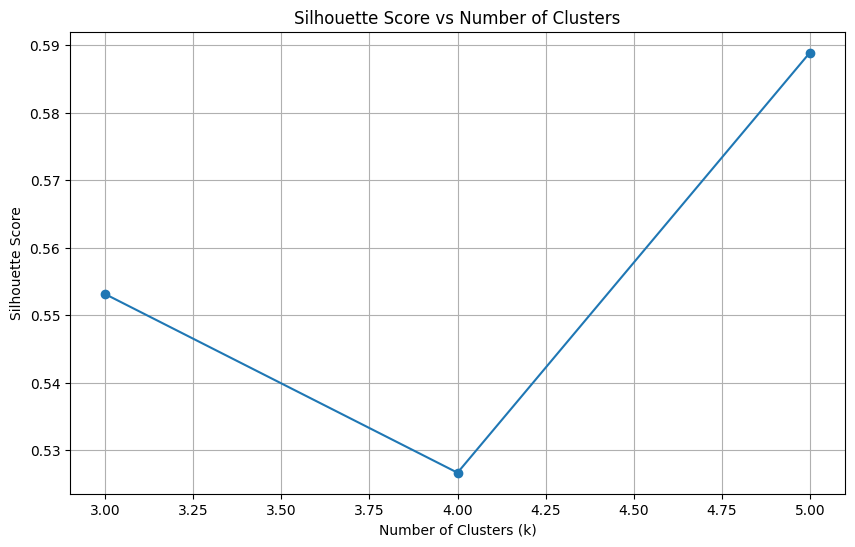

In [10]:
import matplotlib.pyplot as plt
min_k=3
max_k=5
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_k, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()


SVM Algorithm

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

def classify_volatilities(forecasted_volatility_results, actual_volatility_results, threshold=None):
    
    # Prepare the data
    companies = list(forecasted_volatility_results.keys())
    forecasted_volatilities = list(forecasted_volatility_results.values())
    actual_volatilities_values = list(actual_volatility_results.values())

    # Calculate the mean of forecasted volatilities if threshold is not provided
    if threshold is None:
        threshold = np.mean(forecasted_volatilities)
    print(f'Using threshold: {threshold}')

    # Define the target variable based on the threshold
    targets = [1 if vol > threshold else 0 for vol in forecasted_volatilities]

    # Create a DataFrame
    data = {
        'Company': companies,
        'Forecasted_Volatility': forecasted_volatilities,
        'Actual_Volatility': actual_volatilities_values,
        'Target': targets
    }
    df = pd.DataFrame(data)

    # Features and target
    X = df[['Forecasted_Volatility']]
    y = df['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM model
    model = svm.SVC(kernel='linear', C=1.0, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_scaled)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

    # Classify all companies
    X_scaled = scaler.transform(X)
    df['Class'] = model.predict(X_scaled)

    # Display the classified companies
    print(df)

    # Create lists of high and low volatility stocks
    high_volatility_stocks = df[df['Class'] == 1]['Company'].tolist()
    low_volatility_stocks = df[df['Class'] == 0]['Company'].tolist()

    print("High Volatility Stocks:", high_volatility_stocks)
    print("Low Volatility Stocks:", low_volatility_stocks)

    return df, high_volatility_stocks, low_volatility_stocks



In [14]:
df, high_volatility_stocks, low_volatility_stocks = classify_volatilities(volatility_results, actual_volatilities)

Using threshold: 0.015344921296901426
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

                Company  Forecasted_Volatility  Actual_Volatility  Target  \
0             Axis_Bank               0.013712           0.000273       0   
1         Bajaj_Finance               0.016004           0.000355       1   
2            Coal_India               0.022083           0.000408       1   
3              HCL_Tech               0.014764           0.000235       0   
4             HDFC_Bank               0.011424           0.000206       0   
5    Hinudstan_Unilever               0.012045           0.000165       0   
6            ICICI_Bank               0.012113           0.000225       0   
7   